#Pythonで学ぶ画像認識　第2章 画像処理の基礎知識
## 第2.3節 畳み込み演算を使った特徴抽出

### モジュールのインポートとGoogleドライブのマウント

In [1]:
from PIL import Image
import numpy as np

# 数値計算モジュールのインポート
from scipy import signal

# Googleドライブをマウント
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###微分フィルタのカーネルの生成関数

In [2]:
def generate_kernel():
    # カーネル用の変数を用意
    kernel_h = np.zeros((3, 3))
    kernel_v = np.zeros((3, 3))
    kernel_lap = np.zeros((3, 3))

    # 水平方向の1次微分のカーネルの値を設定
    kernel_h[1, 1] = -1
    kernel_h[1, 2] = 1
    # 垂直方向の1次微分のカーネルの値を設定
    kernel_v[1, 1] = -1
    kernel_v[2, 1] = 1
    # ラプラシアンフィルタのカーネルの値を設定
    kernel_lap[0, 1] = 1
    kernel_lap[1, 0] = 1
    kernel_lap[1, 2] = 1
    kernel_lap[2, 1] = 1
    kernel_lap[1, 1] = -4

    return kernel_h, kernel_v, kernel_lap

###カーネルの生成

In [3]:
# 一次微分とラプラシアンフィルタのカーネルを生成
kernel_h, kernel_v, kernel_lap = generate_kernel()

print('水平方向の1次微分カーネル')
print(kernel_h)
print('垂直方向の1次微分カーネル')
print(kernel_v)
print('ラプラシアンフィルタのカーネル')
print(kernel_lap)

水平方向の1次微分カーネル
[[ 0.  0.  0.]
 [ 0. -1.  1.]
 [ 0.  0.  0.]]
垂直方向の1次微分カーネル
[[ 0.  0.  0.]
 [ 0. -1.  0.]
 [ 0.  1.  0.]]
ラプラシアンフィルタのカーネル
[[ 0.  1.  0.]
 [ 1. -4.  1.]
 [ 0.  1.  0.]]


###微分フィルタの適用

水平方向の1次微分フィルタを適用した画像


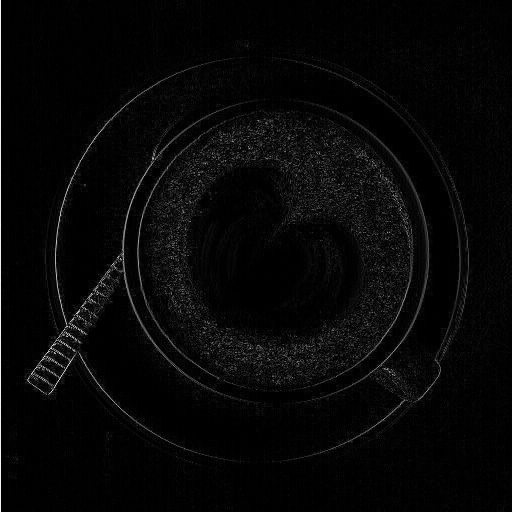

垂直方向の1次微分フィルタを適用した画像


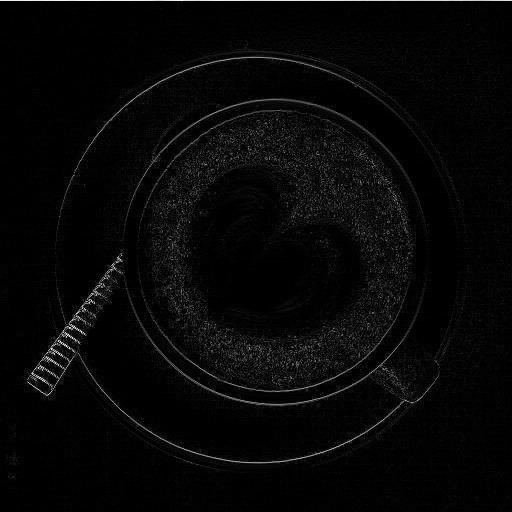

両方向の1次微分フィルタを組み合わせた画像


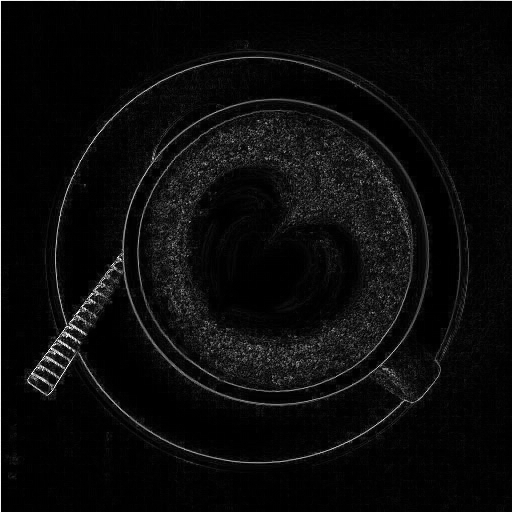

ラプラシアンフィルタを適用した画像


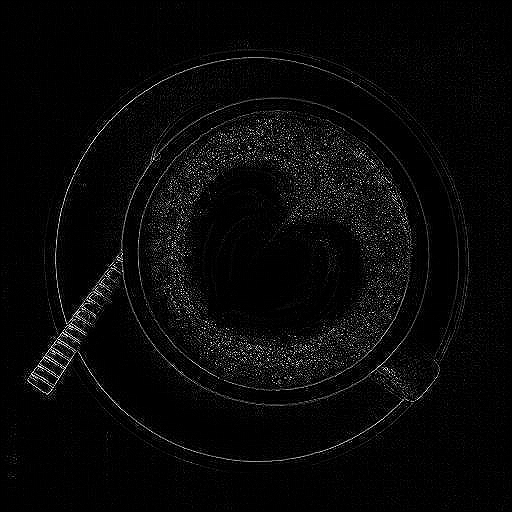

In [4]:
# 画像の読み込み
img = Image.open('drive/MyDrive/python_image_recognition/data/coffee.jpg')

# NumPyとSciPyを使うため画像をNumPy配列に変換
img = np.asarray(img, dtype='int32')

# 畳み込み演算
img_h_diff = signal.convolve2d(
    img, kernel_h, mode='same')
img_v_diff = signal.convolve2d(
    img, kernel_v, mode='same')
img_lap = signal.convolve2d(
    img, kernel_lap, mode='same')

# 微分値の絶対値を計算
img_h_diff = np.absolute(img_h_diff)
img_v_diff = np.absolute(img_v_diff)

# 水平一次微分画像と垂直一次微分画像の合成
img_diff = (img_h_diff ** 2 + img_v_diff ** 2) ** 0.5

# 範囲を超えた画素値をクリップ
img_h_diff = np.clip(img_h_diff, 0, 255).astype('uint8')
img_v_diff = np.clip(img_v_diff, 0, 255).astype('uint8')
img_diff = np.clip(img_diff, 0, 255).astype('uint8')
img_lap = np.clip(img_lap, 0, 255).astype('uint8')

# NumPy配列をPIL画像に変換
img_h_diff = Image.fromarray(img_h_diff)
img_v_diff = Image.fromarray(img_v_diff)
img_diff = Image.fromarray(img_diff)
img_lap = Image.fromarray(img_lap)

print('水平方向の1次微分フィルタを適用した画像')
display(img_h_diff)
print('垂直方向の1次微分フィルタを適用した画像')
display(img_v_diff)
print('両方向の1次微分フィルタを組み合わせた画像')
display(img_diff)
print('ラプラシアンフィルタを適用した画像')
display(img_lap)